In [1]:
#Imports
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import pickle

In [2]:
df=pd.read_csv("test.csv")
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,12.0,_,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717


In [3]:
df.drop(["ID","Customer_ID","Name","Type_of_Loan","SSN"],axis=1,inplace=True)

In [4]:
df.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [5]:
df.isna().sum()

Month                          0
Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df['Month'].unique()

array(['September', 'October', 'December', 'November'], dtype=object)

In [9]:
df['Occupation'].unique()
df=df[df['Occupation']!="_______"]

In [10]:
df.reset_index(drop=True,inplace=True)

In [11]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,September,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,October,24,Scientist,19114.12,1824.843333,3,4,3,4,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,October,28,Teacher,34847.84,3037.986667,2,4,6,1,3,...,5.0,Good,605.03,30.116600,27 Years and 4 Months,No,18.816215,251.62736875017606,Low_spent_Large_value_payments,303.3550833433617
3,December,28,Teacher,34847.84,3037.986667,2,4,6,1,3,...,5.0,_,605.03,33.875167,27 Years and 6 Months,No,18.816215,153.53448761392985,!@9#%8,421.44796447960783
4,October,35,Engineer,143162.64,12187.220000,1,5,8,3,6,...,3.0,Good,1303.01,35.685836,18 Years and 6 Months,No,246.992319,453.6151305781054,Low_spent_Large_value_payments,788.1145499681528


In [12]:
df['Credit_Mix']=df.pop('Credit_Mix')

C:\Users\User\AppData\Local\Temp\ipykernel_15476\2714281069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Credit_Mix']=df.pop('Credit_Mix')


In [13]:
df.dtypes

Month                        object
Age                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Mix                   object
dtype: object

In [14]:
df['Age']=df['Age'].str.replace(r'[^\d]','',regex=True).astype('int64')

C:\Users\User\AppData\Local\Temp\ipykernel_15476\1249098950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age']=df['Age'].str.replace(r'[^\d]','',regex=True).astype('int64')


In [15]:
df['Annual_Income']=df['Annual_Income'].str.replace(r'[^\d.]','',regex=True).astype('float64')

C:\Users\User\AppData\Local\Temp\ipykernel_15476\2675223077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Annual_Income']=df['Annual_Income'].str.replace(r'[^\d.]','',regex=True).astype('float64')


In [16]:
df['Num_of_Loan']=df['Num_of_Loan'].str.replace(r'[^\d]','',regex=True).astype('int64')

C:\Users\User\AppData\Local\Temp\ipykernel_15476\3188663809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Num_of_Loan']=df['Num_of_Loan'].str.replace(r'[^\d]','',regex=True).astype('int64')


In [17]:
df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].str.replace(r'[^\d]','',regex=True).astype('int64')

C:\Users\User\AppData\Local\Temp\ipykernel_15476\2722156190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].str.replace(r'[^\d]','',regex=True).astype('int64')


In [18]:
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].str.replace(r'[^\d.]','',regex=True).replace('',np.nan).astype('float64')

C:\Users\User\AppData\Local\Temp\ipykernel_15476\2328717650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].str.replace(r'[^\d.]','',regex=True).replace('',np.nan).astype('float64')


In [19]:
df.isna().sum()
df.dropna(inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_15476\1832297273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [20]:
df['Outstanding_Debt']=df['Outstanding_Debt'].str.replace(r'[^\d.]','',regex=True).astype('float64')

C:\Users\User\AppData\Local\Temp\ipykernel_15476\410851824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Outstanding_Debt']=df['Outstanding_Debt'].str.replace(r'[^\d.]','',regex=True).astype('float64')


In [21]:
df['Credit_History_Age']=df['Credit_History_Age'].apply(lambda x: (int(re.search(r"(\d+)\s*[yY]ears?",x).group(1))*12) + int(re.search(r"(\d+)\s*[mM]onths?",x).group(1)))

C:\Users\User\AppData\Local\Temp\ipykernel_15476\651390458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Credit_History_Age']=df['Credit_History_Age'].apply(lambda x: (int(re.search(r"(\d+)\s*[yY]ears?",x).group(1))*12) + int(re.search(r"(\d+)\s*[mM]onths?",x).group(1)))


In [22]:
df.rename({'Credit_History_Age':'Credit_History_Age(in months)'},inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_15476\2196858084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename({'Credit_History_Age':'Credit_History_Age(in months)'},inplace=True)


In [23]:
df['Amount_invested_monthly']=df['Amount_invested_monthly'].str.replace(r'[^\d]','',regex=True).astype('float64')

C:\Users\User\AppData\Local\Temp\ipykernel_15476\1882006361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Amount_invested_monthly']=df['Amount_invested_monthly'].str.replace(r'[^\d]','',regex=True).astype('float64')


In [24]:
df=df[df['Payment_Behaviour']!='!@9#%8']

In [25]:
df['Monthly_Balance']=df['Monthly_Balance'].str.replace(r'[^\d.]','',regex=True).astype('float64')

In [26]:
df=df[df['Credit_Mix']!='_']

In [27]:
df.reset_index(drop=True,inplace=True)

In [28]:
def detect_outliers_iqr(data,col):
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    iqr=q3-q1
    min_range=q1-1.5*iqr
    max_range=q3+1.5*iqr
    return min_range,max_range

In [29]:
iqr_dict={}
for i in df.columns:
    if df[i].dtype in [int,float]:
        outliers_range=detect_outliers_iqr(df,i)
        iqr_dict[i]=(outliers_range)
        print(f"Feature:{i} -> Outliers range:{outliers_range}")

Feature:Age -> Outliers range:(np.float64(-2.0), np.float64(70.0))
Feature:Annual_Income -> Outliers range:(np.float64(-59846.59125), np.float64(151176.57875))
Feature:Monthly_Inhand_Salary -> Outliers range:(np.float64(-4786.864062499999), np.float64(12288.011770833331))
Feature:Num_Bank_Accounts -> Outliers range:(np.float64(-0.5), np.float64(11.5))
Feature:Num_Credit_Card -> Outliers range:(np.float64(-0.5), np.float64(11.5))
Feature:Interest_Rate -> Outliers range:(np.float64(-12.5), np.float64(39.5))
Feature:Num_of_Loan -> Outliers range:(np.float64(-4.0), np.float64(12.0))
Feature:Delay_from_due_date -> Outliers range:(np.float64(-17.0), np.float64(55.0))
Feature:Num_of_Delayed_Payment -> Outliers range:(np.float64(-4.5), np.float64(31.5))
Feature:Changed_Credit_Limit -> Outliers range:(np.float64(-8.945000000000002), np.float64(28.935000000000002))
Feature:Num_Credit_Inquiries -> Outliers range:(np.float64(-5.0), np.float64(19.0))
Feature:Outstanding_Debt -> Outliers range:(np.f

In [30]:
df=df[(df['Age']>0) & (df['Age']<100)]

In [31]:
df.describe().loc[['min','max']]

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
min,14.0,7005.93,303.645417,-1.0,0.0,1.0,0.0,-5.0,0.0,0.01,0.0,0.23,21.248071,10.0,0.0,0.000000e+00,1.034022e-01
max,95.0,24137255.00,15204.633333,1781.0,1499.0,5799.0,1496.0,67.0,4343.0,35.81,2593.0,4998.07,48.540663,408.0,82398.0,6.393182e+16,3.333333e+26


In [32]:
df=df[(df['Num_Bank_Accounts']>0) & (df['Num_Bank_Accounts']<11)]

In [33]:
df=df[(df['Num_Credit_Card']>0) & (df['Num_Credit_Card']<11)]

In [34]:
df=df[df['Interest_Rate']<100]

In [35]:
df=df[df['Num_of_Loan']<12]

In [36]:
df=df[df['Delay_from_due_date']>0]

In [37]:
df=df[df['Num_of_Delayed_Payment']<iqr_dict['Num_of_Delayed_Payment'][1]]

In [38]:
df=df[df['Num_Credit_Inquiries']<=20]

In [39]:
df=df[(df['Outstanding_Debt']>10)&(df['Outstanding_Debt']<iqr_dict['Outstanding_Debt'][1])]

In [40]:
df=df[df['Total_EMI_per_month']<iqr_dict['Total_EMI_per_month'][1]]

In [41]:
df=df[df['Monthly_Balance']<iqr_dict['Monthly_Balance'][1]]

In [42]:
df.reset_index(drop=True,inplace=True)

ANALYSIS

In [43]:
df.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Mix'],
      dtype='object')

In [44]:
df['Credit_Mix'].value_counts()

Credit_Mix
Standard    7640
Good        3685
Bad         3268
Name: count, dtype: int64

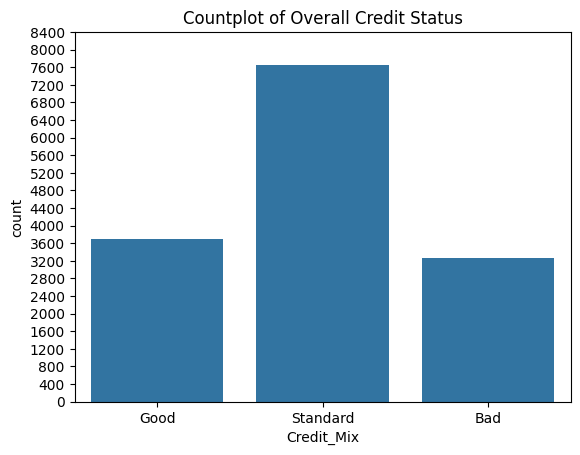

In [45]:
sns.countplot(x=df['Credit_Mix'])
plt.title("Countplot of Overall Credit Status")
plt.yticks(range(0,8500,400))
plt.show()

In [46]:
z=df.groupby("Credit_Mix")[['Outstanding_Debt']].mean().sort_values(by='Outstanding_Debt')
z

,Outstanding_Debt
Credit_Mix,
Good,742.703237
Standard,1094.585211
Bad,2543.317772


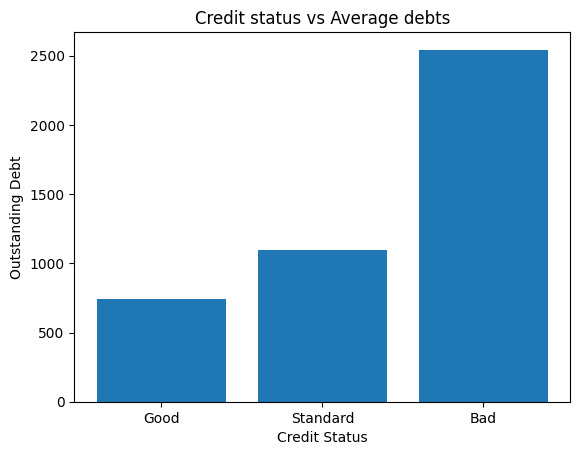

In [47]:
plt.bar(z.index,z['Outstanding_Debt'])
plt.title("Credit status vs Average debts")
plt.xlabel("Credit Status")
plt.ylabel("Outstanding Debt")
plt.show()

In [48]:
z=df.groupby(['Credit_Mix'])['Interest_Rate'].mean().sort_values()
z

Credit_Mix
Good         6.302307
Standard    15.005366
Bad         24.346389
Name: Interest_Rate, dtype: float64

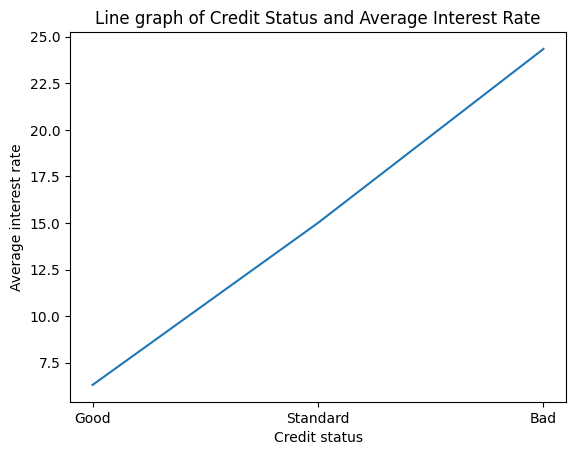

In [49]:
plt.plot(z)
plt.title("Line graph of Credit Status and Average Interest Rate")
plt.xlabel("Credit status")
plt.ylabel("Average interest rate")
plt.show()

In [50]:
z=df.groupby(['Credit_Mix'])['Monthly_Inhand_Salary'].mean().sort_values()
z

Credit_Mix
Bad         2563.740574
Standard    3440.715442
Good        4445.273386
Name: Monthly_Inhand_Salary, dtype: float64

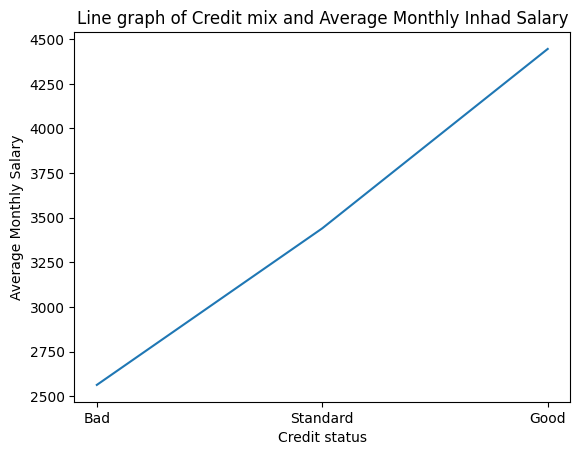

In [51]:
plt.plot(z)
plt.title("Line graph of Credit mix and Average Monthly Inhad Salary")
plt.xlabel("Credit status")
plt.ylabel("Average Monthly Salary")
plt.show()

In [52]:
z=df.groupby(['Credit_Mix'])['Num_of_Loan'].sum().sort_values()
z

Credit_Mix
Good         7603
Bad         19842
Standard    23976
Name: Num_of_Loan, dtype: int64

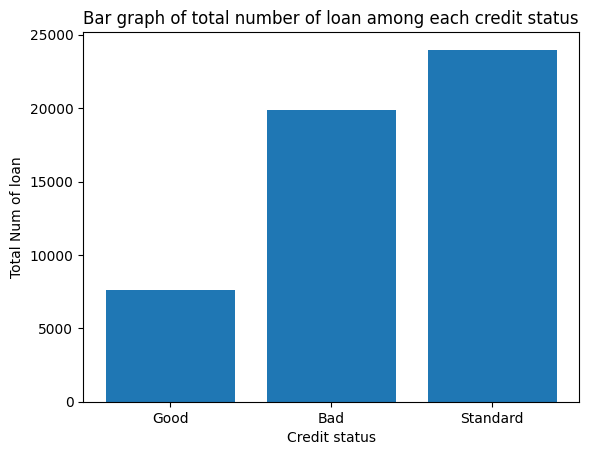

In [53]:
plt.bar(z.index,z)
plt.xlabel("Credit status")
plt.ylabel("Total Num of loan")
plt.title("Bar graph of total number of loan among each credit status")
plt.show()

In [54]:
z=df.groupby(['Credit_Mix'])['Delay_from_due_date'].mean().sort_values()
z

Credit_Mix
Good        11.066757
Standard    19.426047
Bad         38.285496
Name: Delay_from_due_date, dtype: float64

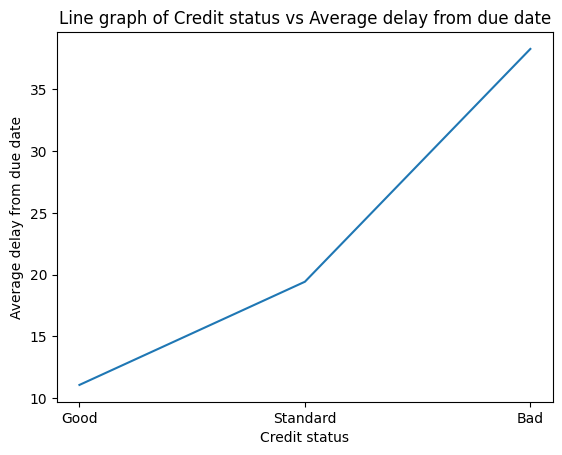

In [55]:
plt.plot(z)
plt.xlabel("Credit status")
plt.ylabel("Average delay from due date")
plt.title("Line graph of Credit status vs Average delay from due date")
plt.show()

In [56]:
z=df.groupby(['Credit_Mix'])['Num_of_Delayed_Payment'].mean().sort_values()
z

Credit_Mix
Good         7.498779
Standard    14.038351
Bad         19.952570
Name: Num_of_Delayed_Payment, dtype: float64

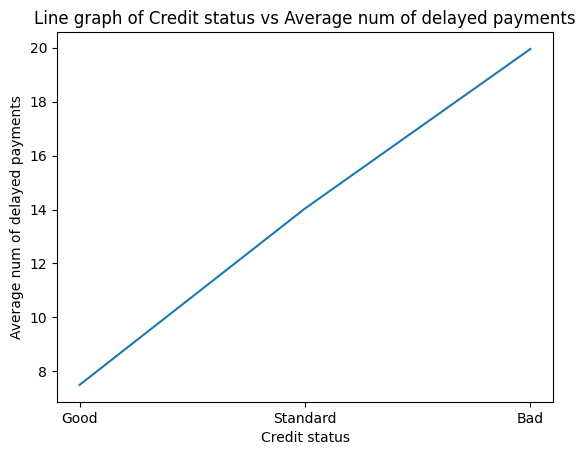

In [57]:
plt.plot(z)
plt.xlabel("Credit status")
plt.ylabel("Average num of delayed payments")
plt.title("Line graph of Credit status vs Average num of delayed payments")
plt.show()

In [58]:
z=df.groupby(['Credit_Mix'])[['Monthly_Balance']].mean().sort_values(by='Monthly_Balance',ascending=False)
z

,Monthly_Balance
Credit_Mix,
Good,407.415388
Standard,363.147439
Bad,284.631056


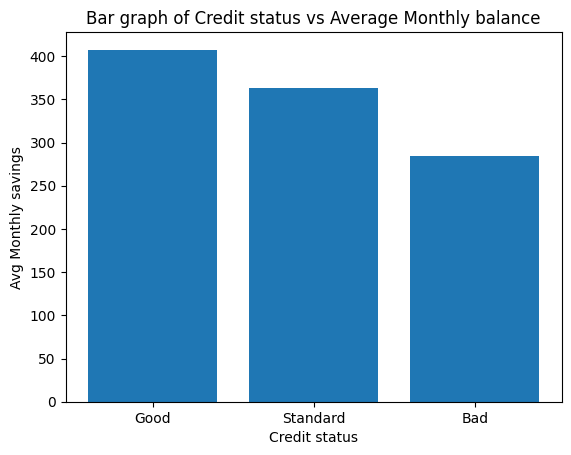

In [59]:
plt.bar(z.index,z['Monthly_Balance'])
plt.xlabel('Credit status')
plt.ylabel('Avg Monthly savings')
plt.title("Bar graph of Credit status vs Average Monthly balance")
plt.show()

In [60]:
df.groupby(['Credit_Mix','Month'])[['Month']].count()

Month
Credit_Mix Month           
Bad        December     796
           November     826
           October      795
           September    851
Good       December     947
           November     927
           October      889
           September    922
Standard   December    1948
           November    1883
           October     1886
           September   1923

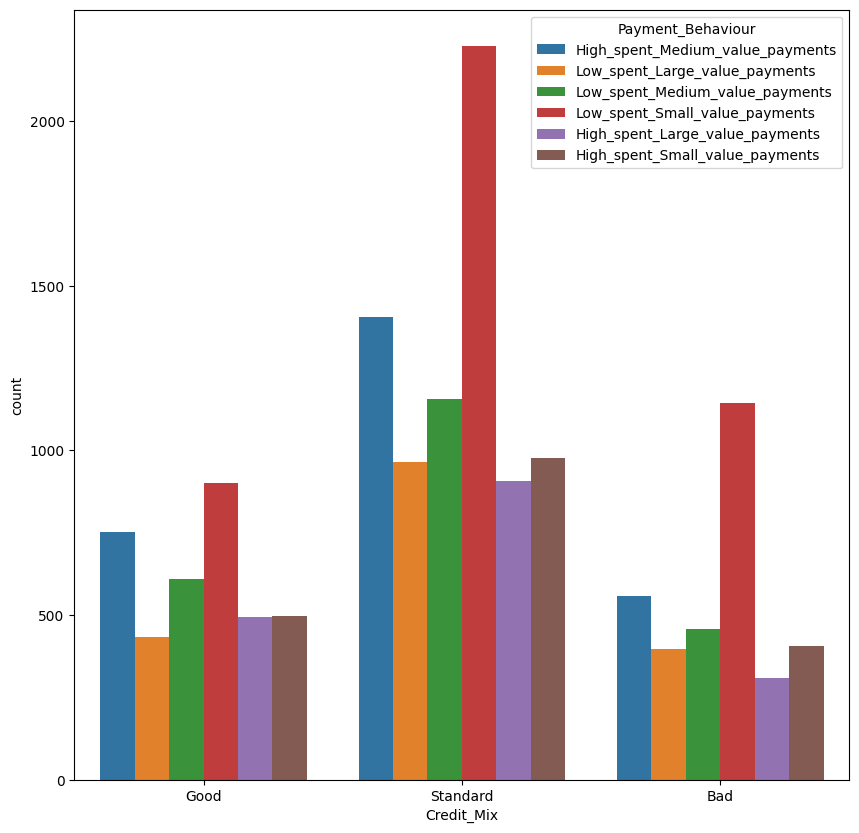

In [61]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['Credit_Mix'],hue=df['Payment_Behaviour'])
plt.show()

Encoding

In [62]:
df.dtypes

Month                        object
Age                           int64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Delay_from_due_date           int64
Num_of_Delayed_Payment        int64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age            int64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Mix                   object
dtype: object

In [63]:
for i in df:
    if df[i].dtype == object:
        print(i)

Month
Occupation
Payment_of_Min_Amount
Payment_Behaviour
Credit_Mix


In [64]:
df['Month'].unique()
month=OrdinalEncoder(categories=[['September', 'October', 'November', 'December']])
df['Month']=month.fit_transform(df[['Month']])

In [65]:
df['Occupation'].unique()
occupation=LabelEncoder()
df['Occupation']=occupation.fit_transform(df['Occupation'])

In [66]:
df['Payment_of_Min_Amount'].unique()
payment_of_min=LabelEncoder()
df['Payment_of_Min_Amount']=payment_of_min.fit_transform(df['Payment_of_Min_Amount'])

In [67]:
df['Payment_Behaviour'].unique()
payment_behaviour=OrdinalEncoder(categories=[['Low_spent_Small_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Large_value_payments', 'High_spent_Small_value_payments', 'High_spent_Medium_value_payments', 'High_spent_Large_value_payments']])
df['Payment_Behaviour']=payment_behaviour.fit_transform(df[['Payment_Behaviour']])

In [68]:
credit_mix=OrdinalEncoder(categories=[['Bad','Standard','Good']])
df['Credit_Mix']=credit_mix.fit_transform(df[['Credit_Mix']])

In [69]:
corr=df.corr(numeric_only=True)['Credit_Mix'].abs().sort_values()
corr=corr.tail(11)
corr

Payment_of_Min_Amount     0.440537
Num_Credit_Card           0.504166
Num_of_Loan               0.584454
Credit_History_Age        0.594605
Num_Credit_Inquiries      0.615508
Delay_from_due_date       0.649168
Outstanding_Debt          0.651060
Num_Bank_Accounts         0.669954
Interest_Rate             0.716692
Num_of_Delayed_Payment    0.722147
Credit_Mix                1.000000
Name: Credit_Mix, dtype: float64

In [70]:
df2=df[corr.index]
df2

,Payment_of_Min_Amount,Num_Credit_Card,Num_of_Loan,Credit_History_Age,Num_Credit_Inquiries,Delay_from_due_date,Outstanding_Debt,Num_Bank_Accounts,Interest_Rate,Num_of_Delayed_Payment,Credit_Mix
0,1,4,4,274,4.0,3,809.98,3,3,9,2.0
1,1,4,1,328,5.0,3,605.03,2,6,3,2.0
2,1,5,1,215,4.0,5,632.46,2,4,6,2.0
3,1,5,1,217,4.0,5,632.46,2,4,6,2.0
4,1,5,1,218,7.0,6,632.46,2,4,6,2.0
...,...,...,...,...,...,...,...,...,...,...,...
14588,0,4,4,212,6.0,12,678.57,4,3,6,2.0
14589,1,1,4,261,8.0,1,897.16,1,5,0,2.0
14590,2,8,5,76,9.0,33,3571.70,10,29,25,0.0
14591,2,8,5,77,12.0,33,3571.70,10,29,25,0.0


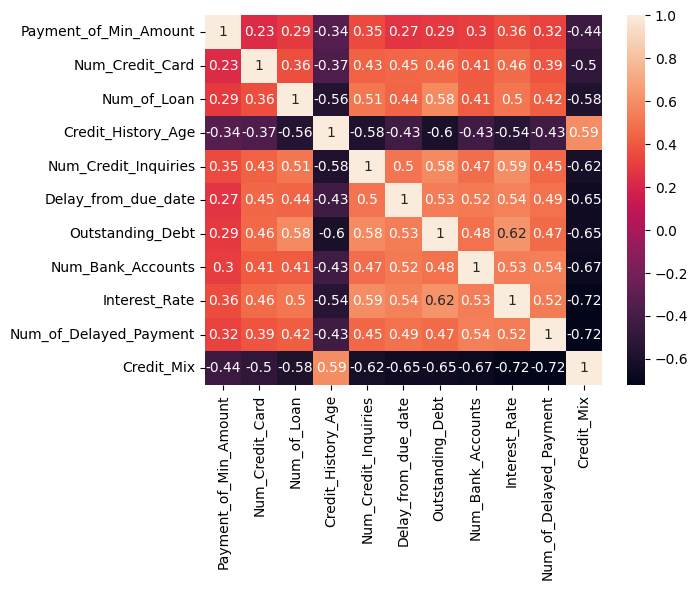

In [71]:
plt.Figure(figsize=(10,10))
sns.heatmap(df2.corr(numeric_only=True),annot=True)
plt.show()

Modelling

In [72]:
X=df.drop(['Credit_Mix'],axis=1)
y=df['Credit_Mix']

In [73]:
minmax=MinMaxScaler()
X_scaled=minmax.fit_transform(X)

In [74]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

In [75]:
X_train.shape,y_train.shape

((10215, 21), (10215,))

In [76]:
models=[KNeighborsClassifier(),SVC(),GaussianNB(),DecisionTreeClassifier(random_state=42),RandomForestClassifier(random_state=42),GradientBoostingClassifier(random_state=42),AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3, class_weight='balanced', random_state=42),n_estimators=100,random_state=42),XGBClassifier()]
for model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"Accuracy score of train data of {str(model).split('(')[0]} =",model.score(X_train,y_train)*100)
    print(f"Accuracy score of test data of {str(model).split('(')[0]} =", accuracy_score(y_test,y_pred)*100)

Accuracy score of train data of KNeighborsClassifier = 91.9627998042095
Accuracy score of test data of KNeighborsClassifier = 86.8204659661946
Accuracy score of train data of SVC = 92.73617229564366
Accuracy score of test data of SVC = 91.61717679305619
Accuracy score of train data of GaussianNB = 87.498776309349
Accuracy score of test data of GaussianNB = 86.54636820465966
Accuracy score of train data of DecisionTreeClassifier = 100.0
Accuracy score of test data of DecisionTreeClassifier = 92.59936043855642
Accuracy score of train data of RandomForestClassifier = 100.0
Accuracy score of test data of RandomForestClassifier = 95.84285061671997
Accuracy score of train data of GradientBoostingClassifier = 95.05628976994616
Accuracy score of test data of GradientBoostingClassifier = 94.19826404751028
Accuracy score of train data of AdaBoostClassifier = 94.23396965247186
Accuracy score of test data of AdaBoostClassifier = 92.73640931932388
Accuracy score of train data of XGBClassifier = 100

Feature Elimination

In [77]:
X=df.drop(columns=['Credit_Mix'])
y=df['Credit_Mix']
model=RandomForestClassifier(random_state=42)
rfe=RFE(estimator=model,n_features_to_select=10)
rfe.fit(X,y)
rfe.get_support()

array([False, False, False, False, False,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
       False, False, False])

In [78]:
X.columns[rfe.get_support()]

Index(['Num_Bank_Accounts', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_History_Age',
       'Payment_of_Min_Amount'],
      dtype='object')

In [79]:
X=df[X.columns[rfe.get_support()]]

In [80]:
z=X.copy()
z['Credit_Mix']=y

In [81]:
z['Credit_Mix'].unique()

array([2., 1., 0.])

In [82]:
z['Credit_Mix'].value_counts()

Credit_Mix
1.0    7640
2.0    3685
0.0    3268
Name: count, dtype: int64

In [83]:
minmax=MinMaxScaler()
X_scaled=minmax.fit_transform(X)

In [84]:
X_scaled.shape

(14593, 10)

In [85]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [86]:
dict_models={}
for model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"Accuracy score of {str(model).split('(')[0]} =",accuracy_score(y_test,y_pred)*100)
    print(f"Classification report\n",classification_report(y_test,y_pred))
    dict_models[str(model).split('(')[0]]=accuracy_score(y_test,y_pred)*100

Accuracy score of KNeighborsClassifier = 82.02375513933303
Classification report
               precision    recall  f1-score   support

         0.0       0.84      0.85      0.85       920
         1.0       0.83      0.83      0.83      2336
         2.0       0.77      0.78      0.78      1122

    accuracy                           0.82      4378
   macro avg       0.82      0.82      0.82      4378
weighted avg       0.82      0.82      0.82      4378

Accuracy score of SVC = 62.90543627227044
Classification report
               precision    recall  f1-score   support

         0.0       0.78      0.63      0.70       920
         1.0       0.60      0.93      0.73      2336
         2.0       0.00      0.00      0.00      1122

    accuracy                           0.63      4378
   macro avg       0.46      0.52      0.48      4378
weighted avg       0.48      0.63      0.54      4378

Accuracy score of GaussianNB = 87.52855185015989
Classification report
               preci

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Accuracy score of RandomForestClassifier = 96.094106898127
Classification report
               precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       920
         1.0       0.97      0.96      0.96      2336
         2.0       0.95      0.95      0.95      1122

    accuracy                           0.96      4378
   macro avg       0.96      0.96      0.96      4378
weighted avg       0.96      0.96      0.96      4378

Accuracy score of GradientBoostingClassifier = 94.33531292827774
Classification report
               precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       920
         1.0       0.95      0.95      0.95      2336
         2.0       0.93      0.93      0.93      1122

    accuracy                           0.94      4378
   macro avg       0.94      0.94      0.94      4378
weighted avg       0.94      0.94      0.94      4378

Accuracy score of AdaBoostClassifier = 92.00548195523069
Classificat

In [87]:
dict_models

{'KNeighborsClassifier': 82.02375513933303,
 'SVC': 62.90543627227044,
 'GaussianNB': 87.52855185015989,
 'DecisionTreeClassifier': 93.03334856098675,
 'RandomForestClassifier': 96.094106898127,
 'GradientBoostingClassifier': 94.33531292827774,
 'AdaBoostClassifier': 92.00548195523069,
 'XGBClassifier': 95.5230698949292}

In [88]:
dict_models=dict(sorted(dict_models.items(),key=lambda x:x[1]))
dict_models

{'SVC': 62.90543627227044,
 'KNeighborsClassifier': 82.02375513933303,
 'GaussianNB': 87.52855185015989,
 'AdaBoostClassifier': 92.00548195523069,
 'DecisionTreeClassifier': 93.03334856098675,
 'GradientBoostingClassifier': 94.33531292827774,
 'XGBClassifier': 95.5230698949292,
 'RandomForestClassifier': 96.094106898127}

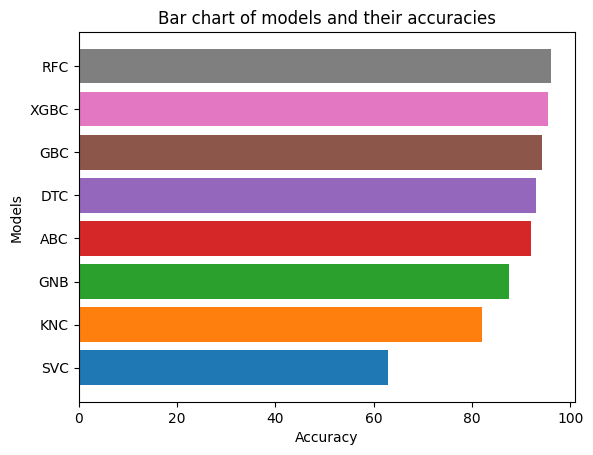

In [89]:
plt.barh([''.join(re.findall(r'[A-Z]+',i)) for i in dict_models.keys()],dict_models.values(),color=plt.cm.tab10(range(len(dict_models.keys()))))
plt.title("Bar chart of models and their accuracies")
plt.xlabel("Accuracy")
plt.ylabel("Models")
plt.show()

Hyperparameter Tuning

In [92]:
param_grid={"n_estimators":[50,100,200],"max_depth":[None,5,10],"min_samples_split":[2,5,10]}

In [93]:
forest=RandomForestClassifier(random_state=42)
grid_search=GridSearchCV(forest,param_grid=param_grid,cv=5,scoring="accuracy")
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [95]:
grid_search.best_score_
best_model=grid_search.best_estimator_

In [96]:
y_pred=best_model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9613978985838282


In [ ]:
#The accuracy score increased from 96.09% to 96.14%

Pickling

In [98]:
encoders={"Payment_of_min":payment_of_min,'Credit_mix':credit_mix}
feature_names=X.columns.tolist()
dict1={"model":best_model,"encoders":encoders,"scaler":minmax,"features":feature_names}
with open("credit.pkl",'wb') as f:
    pickle.dump(dict1,f)